# Aadhaar Data Analysis: Exploratory Data Analysis (EDA)

**Objective:** Identify meaningful patterns, trends, anomalies, and predictive indicators in Aadhaar enrolment and update data.

**Analysis Framework:**
1. **Univariate Analysis** - Distribution of individual variables
2. **Bivariate Analysis** - Relationships between variable pairs
3. **Trivariate Analysis** - Multi-dimensional patterns
4. **Temporal Analysis** - Time-based trends and seasonality
5. **Geographic Analysis** - State/district/pincode patterns
6. **Anomaly Detection** - Unusual patterns and outliers
7. **Key Insights & Recommendations** - Actionable findings

**Evaluation Criteria:**
- Depth & accuracy of analysis
- Meaningful findings extraction
- Clear & effective visualizations
- Social/administrative impact potential

## 1. Setup: Import Libraries and Load Cleaned Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from datetime import datetime
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [2]:
# Load cleaned datasets using relative path
data_path = Path("../data/processed")

print("Loading cleaned datasets...")
df_enrolment = pd.read_csv(data_path / "enrolment_clean.csv", parse_dates=['date'])
df_demographic = pd.read_csv(data_path / "demographic_clean.csv", parse_dates=['date'])
df_biometric = pd.read_csv(data_path / "biometric_clean.csv", parse_dates=['date'])

print(f"\n✓ Enrolment: {len(df_enrolment):,} rows")
print(f"✓ Demographic: {len(df_demographic):,} rows")
print(f"✓ Biometric: {len(df_biometric):,} rows")
print("\n✓ All datasets loaded successfully!")

Loading cleaned datasets...

✓ Enrolment: 620,911 rows
✓ Demographic: 1,248,473 rows
✓ Biometric: 1,529,485 rows

✓ All datasets loaded successfully!


## 2. Univariate Analysis: Distribution of Individual Variables

Analyze the distribution and characteristics of each variable independently.

UNIVARIATE ANALYSIS: ENROLMENT BY AGE GROUPS

Enrolment Distribution by Age Group:


,Age Group,Total Enrolments,Percentage
0,0-5 years,2881368,62.68
1,5-17 years,1550540,33.73
2,18+ years,164868,3.59


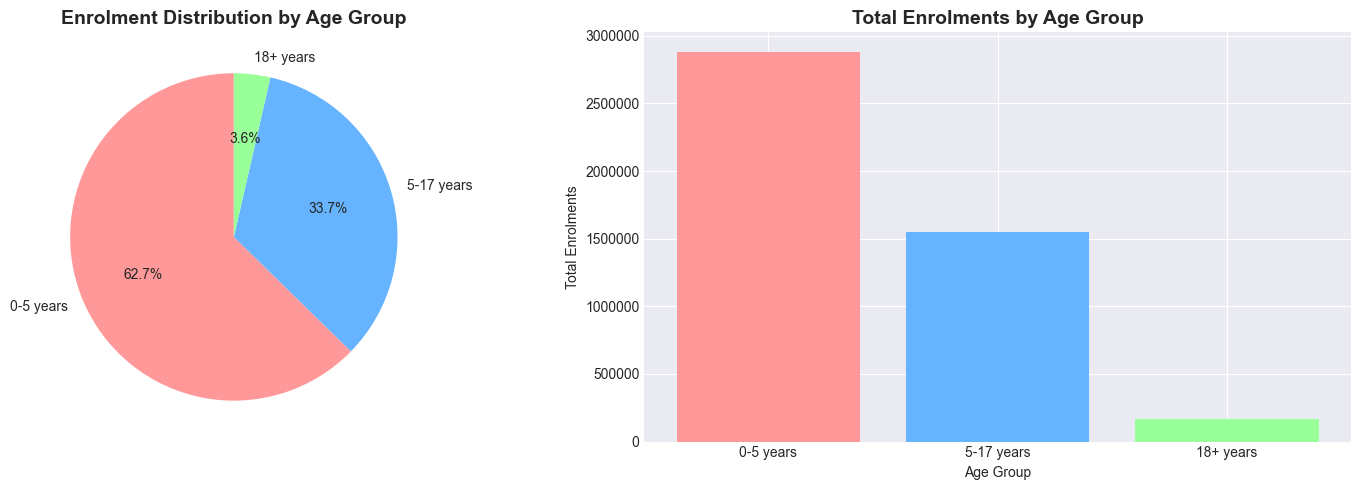


📊 KEY INSIGHT: Age group 0-5 accounts for 62.7% of total enrolments


In [3]:
# 2.1 Enrolment by Age Groups - Distribution
print("="*80)
print("UNIVARIATE ANALYSIS: ENROLMENT BY AGE GROUPS")
print("="*80)

# Calculate total enrolments by age group
total_age_0_5 = df_enrolment['age_0_5'].sum()
total_age_5_17 = df_enrolment['age_5_17'].sum()
total_age_18_plus = df_enrolment['age_18_greater'].sum()

age_distribution = pd.DataFrame({
    'Age Group': ['0-5 years', '5-17 years', '18+ years'],
    'Total Enrolments': [total_age_0_5, total_age_5_17, total_age_18_plus],
    'Percentage': [
        total_age_0_5 / (total_age_0_5 + total_age_5_17 + total_age_18_plus) * 100,
        total_age_5_17 / (total_age_0_5 + total_age_5_17 + total_age_18_plus) * 100,
        total_age_18_plus / (total_age_0_5 + total_age_5_17 + total_age_18_plus) * 100
    ]
})

print("\nEnrolment Distribution by Age Group:")
display(age_distribution)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
axes[0].pie(age_distribution['Total Enrolments'], labels=age_distribution['Age Group'], 
            autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Enrolment Distribution by Age Group', fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(age_distribution['Age Group'], age_distribution['Total Enrolments'], 
            color=['#ff9999','#66b3ff','#99ff99'])
axes[1].set_title('Total Enrolments by Age Group', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Enrolments')
axes[1].set_xlabel('Age Group')
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print(f"\n📊 KEY INSIGHT: Age group 0-5 accounts for {age_distribution['Percentage'].iloc[0]:.1f}% of total enrolments")


TOP 15 STATES BY ACTIVITY


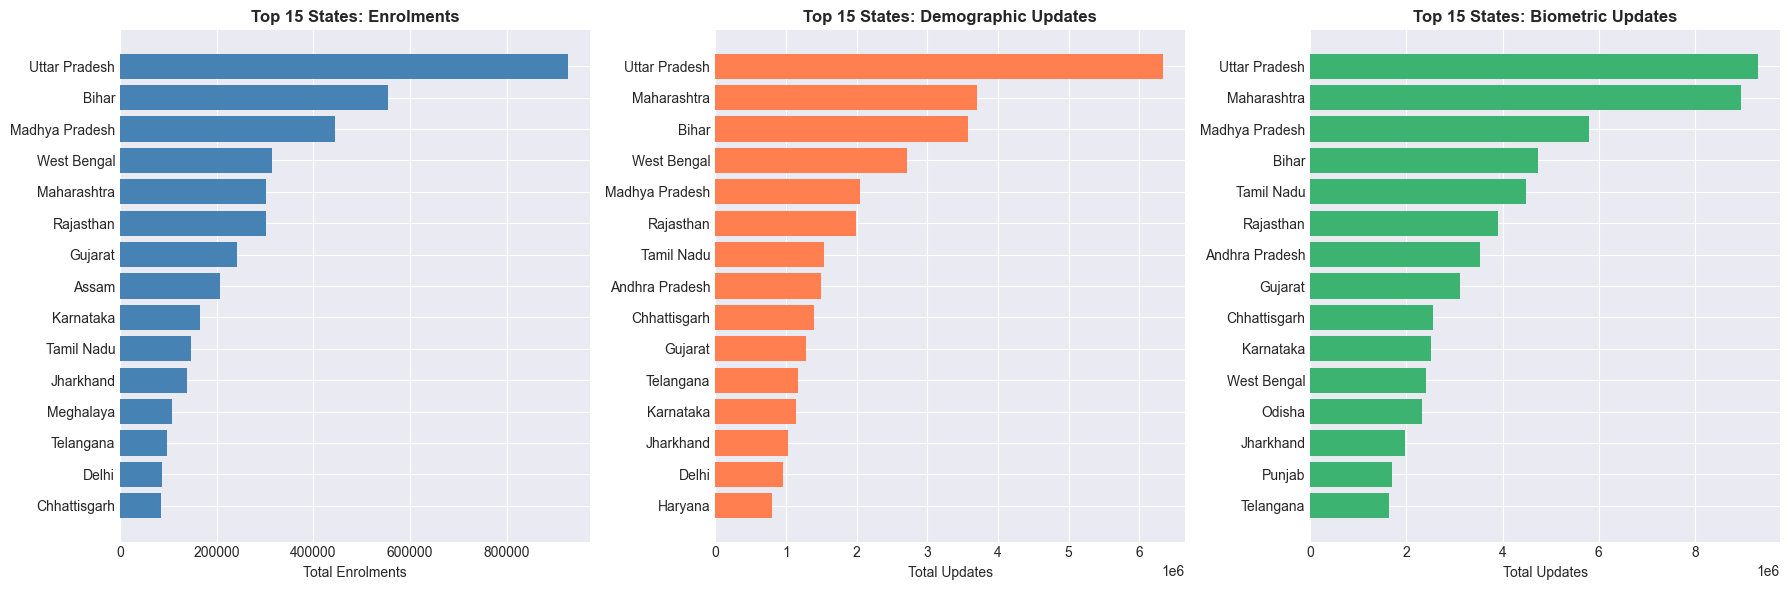


📊 TOP STATES:
  Enrolments: Uttar Pradesh (925,857)
  Demographic Updates: Uttar Pradesh (6,329,391)
  Biometric Updates: Uttar Pradesh (9,304,255)


In [4]:
# 2.2 State-wise Distribution - Top 15 States
print("\n" + "="*80)
print("TOP 15 STATES BY ACTIVITY")
print("="*80)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Enrolment by State
enrol_by_state = df_enrolment.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
enrol_by_state['Total'] = enrol_by_state.sum(axis=1)
top15_enrol = enrol_by_state.nlargest(15, 'Total')

axes[0].barh(top15_enrol.index, top15_enrol['Total'], color='steelblue')
axes[0].set_title('Top 15 States: Enrolments', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Total Enrolments')
axes[0].invert_yaxis()

# Demographic Updates by State
demo_by_state = df_demographic.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum()
demo_by_state['Total'] = demo_by_state.sum(axis=1)
top15_demo = demo_by_state.nlargest(15, 'Total')

axes[1].barh(top15_demo.index, top15_demo['Total'], color='coral')
axes[1].set_title('Top 15 States: Demographic Updates', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Total Updates')
axes[1].invert_yaxis()

# Biometric Updates by State
bio_by_state = df_biometric.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum()
bio_by_state['Total'] = bio_by_state.sum(axis=1)
top15_bio = bio_by_state.nlargest(15, 'Total')

axes[2].barh(top15_bio.index, top15_bio['Total'], color='mediumseagreen')
axes[2].set_title('Top 15 States: Biometric Updates', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Total Updates')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n📊 TOP STATES:")
print(f"  Enrolments: {top15_enrol.index[0]} ({top15_enrol['Total'].iloc[0]:,.0f})")
print(f"  Demographic Updates: {top15_demo.index[0]} ({top15_demo['Total'].iloc[0]:,.0f})")
print(f"  Biometric Updates: {top15_bio.index[0]} ({top15_bio['Total'].iloc[0]:,.0f})")

## 3. Bivariate Analysis: Relationships Between Variables

Explore correlations and relationships between pairs of variables.

BIVARIATE ANALYSIS: CORRELATION BETWEEN AGE GROUPS


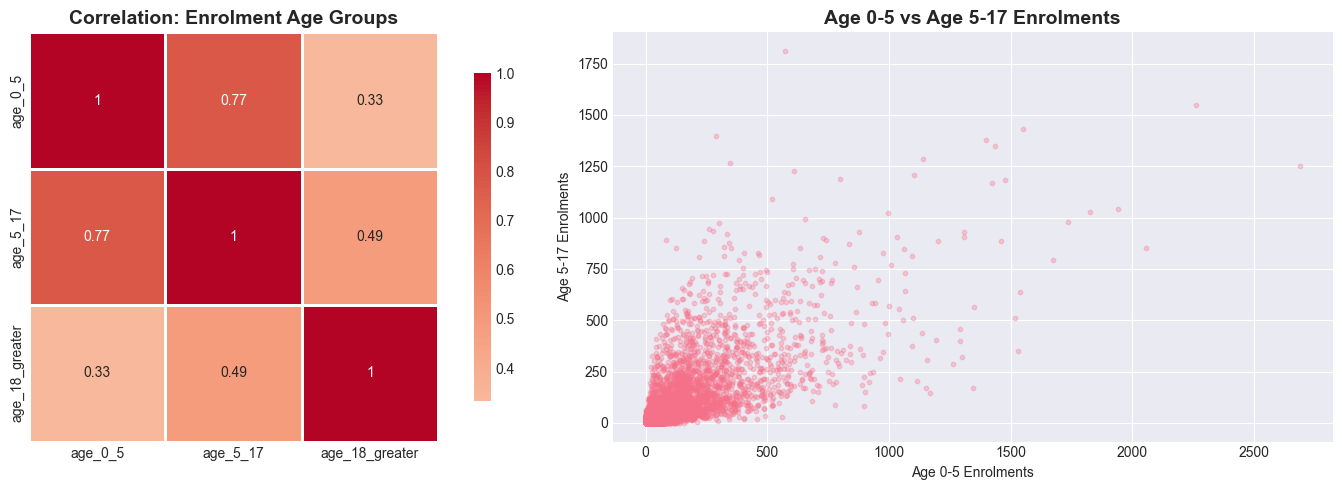


Correlation Matrix:


,age_0_5,age_5_17,age_18_greater
age_0_5,1.00,0.77,0.33
age_5_17,0.77,1.00,0.49
age_18_greater,0.33,0.49,1.00



📊 INSIGHT: Strongest correlation is between ('age_0_5', 'age_5_17') (r=0.774)


In [5]:
# 3.1 Correlation Analysis - Age Groups in Enrolment
print("="*80)
print("BIVARIATE ANALYSIS: CORRELATION BETWEEN AGE GROUPS")
print("="*80)

# Calculate correlation matrix
corr_enrol = df_enrolment[['age_0_5', 'age_5_17', 'age_18_greater']].corr()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap
sns.heatmap(corr_enrol, annot=True, cmap='coolwarm', center=0, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Correlation: Enrolment Age Groups', fontsize=14, fontweight='bold')

# Scatter plot: age_0_5 vs age_5_17
axes[1].scatter(df_enrolment['age_0_5'], df_enrolment['age_5_17'], alpha=0.3, s=10)
axes[1].set_xlabel('Age 0-5 Enrolments')
axes[1].set_ylabel('Age 5-17 Enrolments')
axes[1].set_title('Age 0-5 vs Age 5-17 Enrolments', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
display(corr_enrol)

# Find strongest correlations
strongest_corr = corr_enrol.abs().unstack().sort_values(ascending=False)
strongest_corr = strongest_corr[strongest_corr < 1.0].head(3)
print(f"\n📊 INSIGHT: Strongest correlation is between {strongest_corr.index[0]} (r={strongest_corr.iloc[0]:.3f})")


ENROLMENTS VS UPDATES: STATE-LEVEL COMPARISON


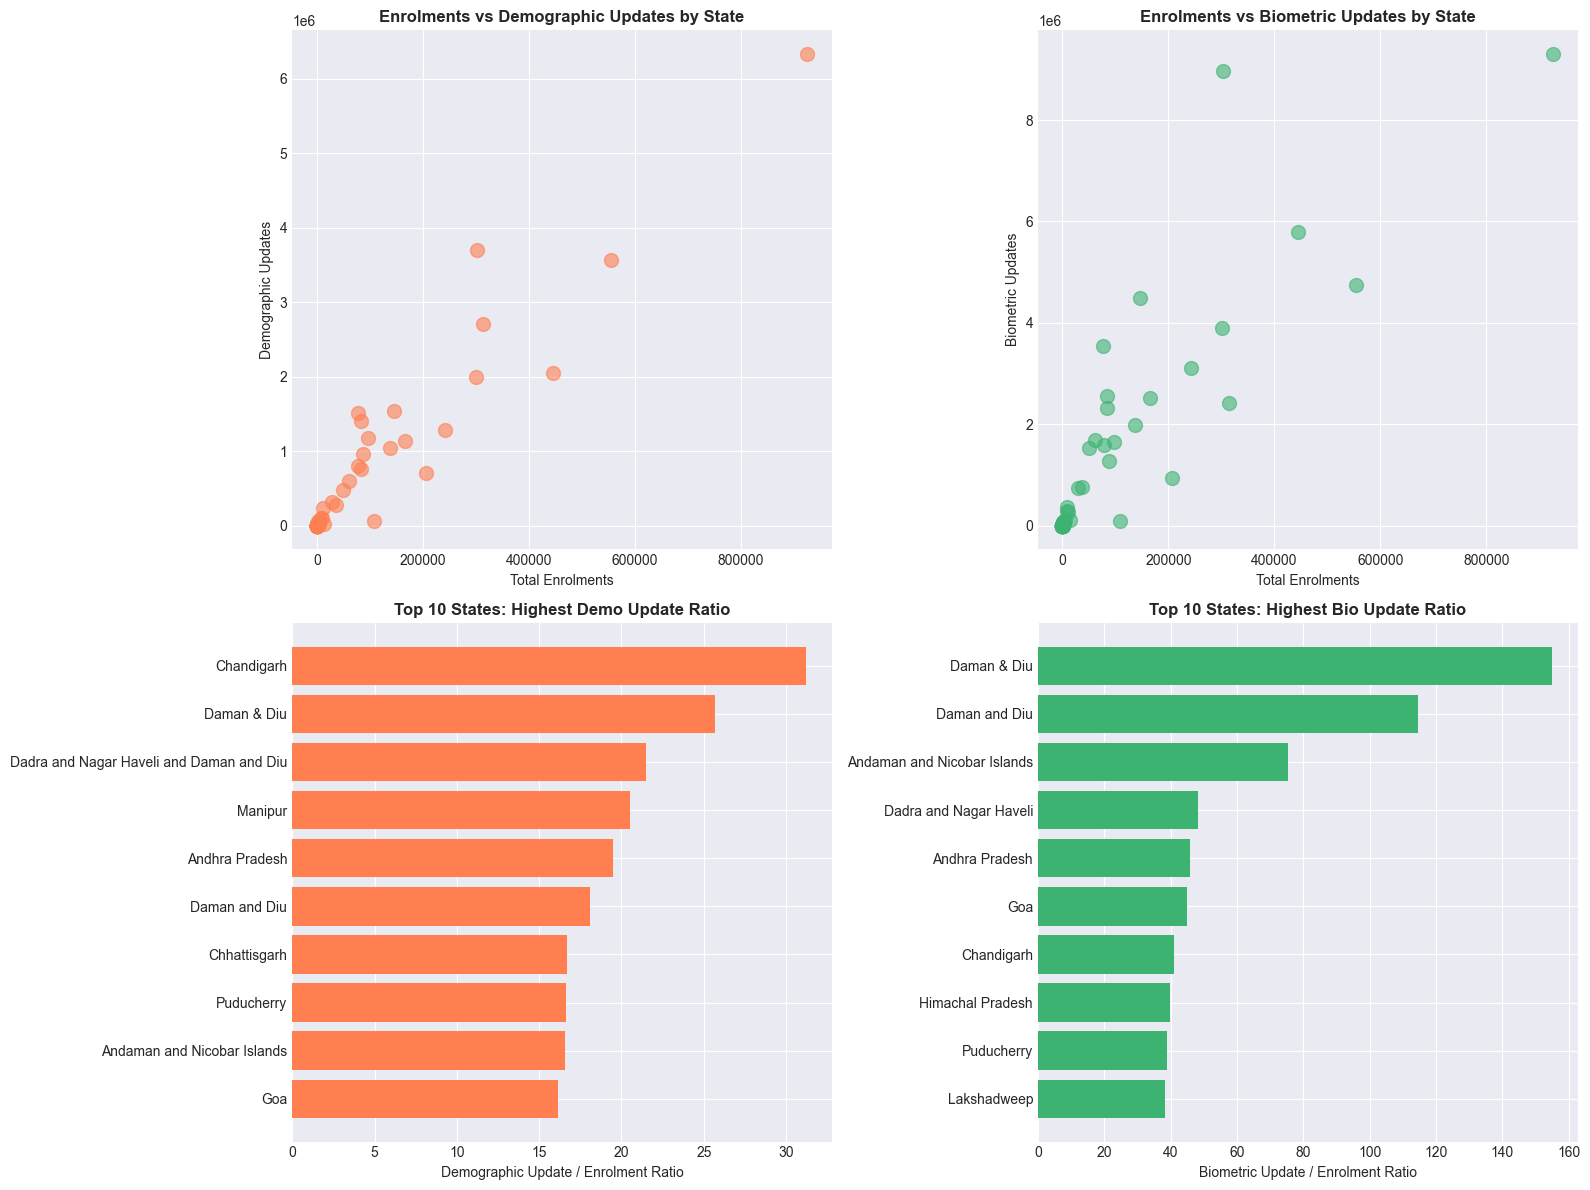


📊 INSIGHTS:
  Highest Demo/Enrol Ratio: Chandigarh (31.22)
  Highest Bio/Enrol Ratio: Daman & Diu (154.92)


In [6]:
# 3.2 Enrolments vs Updates - State Comparison
print("\n" + "="*80)
print("ENROLMENTS VS UPDATES: STATE-LEVEL COMPARISON")
print("="*80)

# Aggregate data by state
state_enrol = df_enrolment.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1)
state_demo = df_demographic.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().sum(axis=1)
state_bio = df_biometric.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum().sum(axis=1)

# Combine into one DataFrame
state_comparison = pd.DataFrame({
    'Enrolments': state_enrol,
    'Demographic_Updates': state_demo,
    'Biometric_Updates': state_bio
}).fillna(0)

# Calculate update-to-enrolment ratios
state_comparison['Demo_to_Enrol_Ratio'] = state_comparison['Demographic_Updates'] / (state_comparison['Enrolments'] + 1)
state_comparison['Bio_to_Enrol_Ratio'] = state_comparison['Biometric_Updates'] / (state_comparison['Enrolments'] + 1)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter: Enrolments vs Demographic Updates
axes[0,0].scatter(state_comparison['Enrolments'], state_comparison['Demographic_Updates'], 
                  alpha=0.6, s=100, c='coral')
axes[0,0].set_xlabel('Total Enrolments')
axes[0,0].set_ylabel('Demographic Updates')
axes[0,0].set_title('Enrolments vs Demographic Updates by State', fontsize=12, fontweight='bold')

# Scatter: Enrolments vs Biometric Updates
axes[0,1].scatter(state_comparison['Enrolments'], state_comparison['Biometric_Updates'], 
                  alpha=0.6, s=100, c='mediumseagreen')
axes[0,1].set_xlabel('Total Enrolments')
axes[0,1].set_ylabel('Biometric Updates')
axes[0,1].set_title('Enrolments vs Biometric Updates by State', fontsize=12, fontweight='bold')

# Top 10 states by Demo-to-Enrol Ratio
top10_demo_ratio = state_comparison.nlargest(10, 'Demo_to_Enrol_Ratio')
axes[1,0].barh(top10_demo_ratio.index, top10_demo_ratio['Demo_to_Enrol_Ratio'], color='coral')
axes[1,0].set_xlabel('Demographic Update / Enrolment Ratio')
axes[1,0].set_title('Top 10 States: Highest Demo Update Ratio', fontsize=12, fontweight='bold')
axes[1,0].invert_yaxis()

# Top 10 states by Bio-to-Enrol Ratio
top10_bio_ratio = state_comparison.nlargest(10, 'Bio_to_Enrol_Ratio')
axes[1,1].barh(top10_bio_ratio.index, top10_bio_ratio['Bio_to_Enrol_Ratio'], color='mediumseagreen')
axes[1,1].set_xlabel('Biometric Update / Enrolment Ratio')
axes[1,1].set_title('Top 10 States: Highest Bio Update Ratio', fontsize=12, fontweight='bold')
axes[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHTS:")
print(f"  Highest Demo/Enrol Ratio: {top10_demo_ratio.index[0]} ({top10_demo_ratio['Demo_to_Enrol_Ratio'].iloc[0]:.2f})")
print(f"  Highest Bio/Enrol Ratio: {top10_bio_ratio.index[0]} ({top10_bio_ratio['Bio_to_Enrol_Ratio'].iloc[0]:.2f})")

## 4. Temporal Analysis: Time-Based Trends

Analyze temporal patterns, seasonality, and trends over time.

TEMPORAL ANALYSIS: DAILY TRENDS


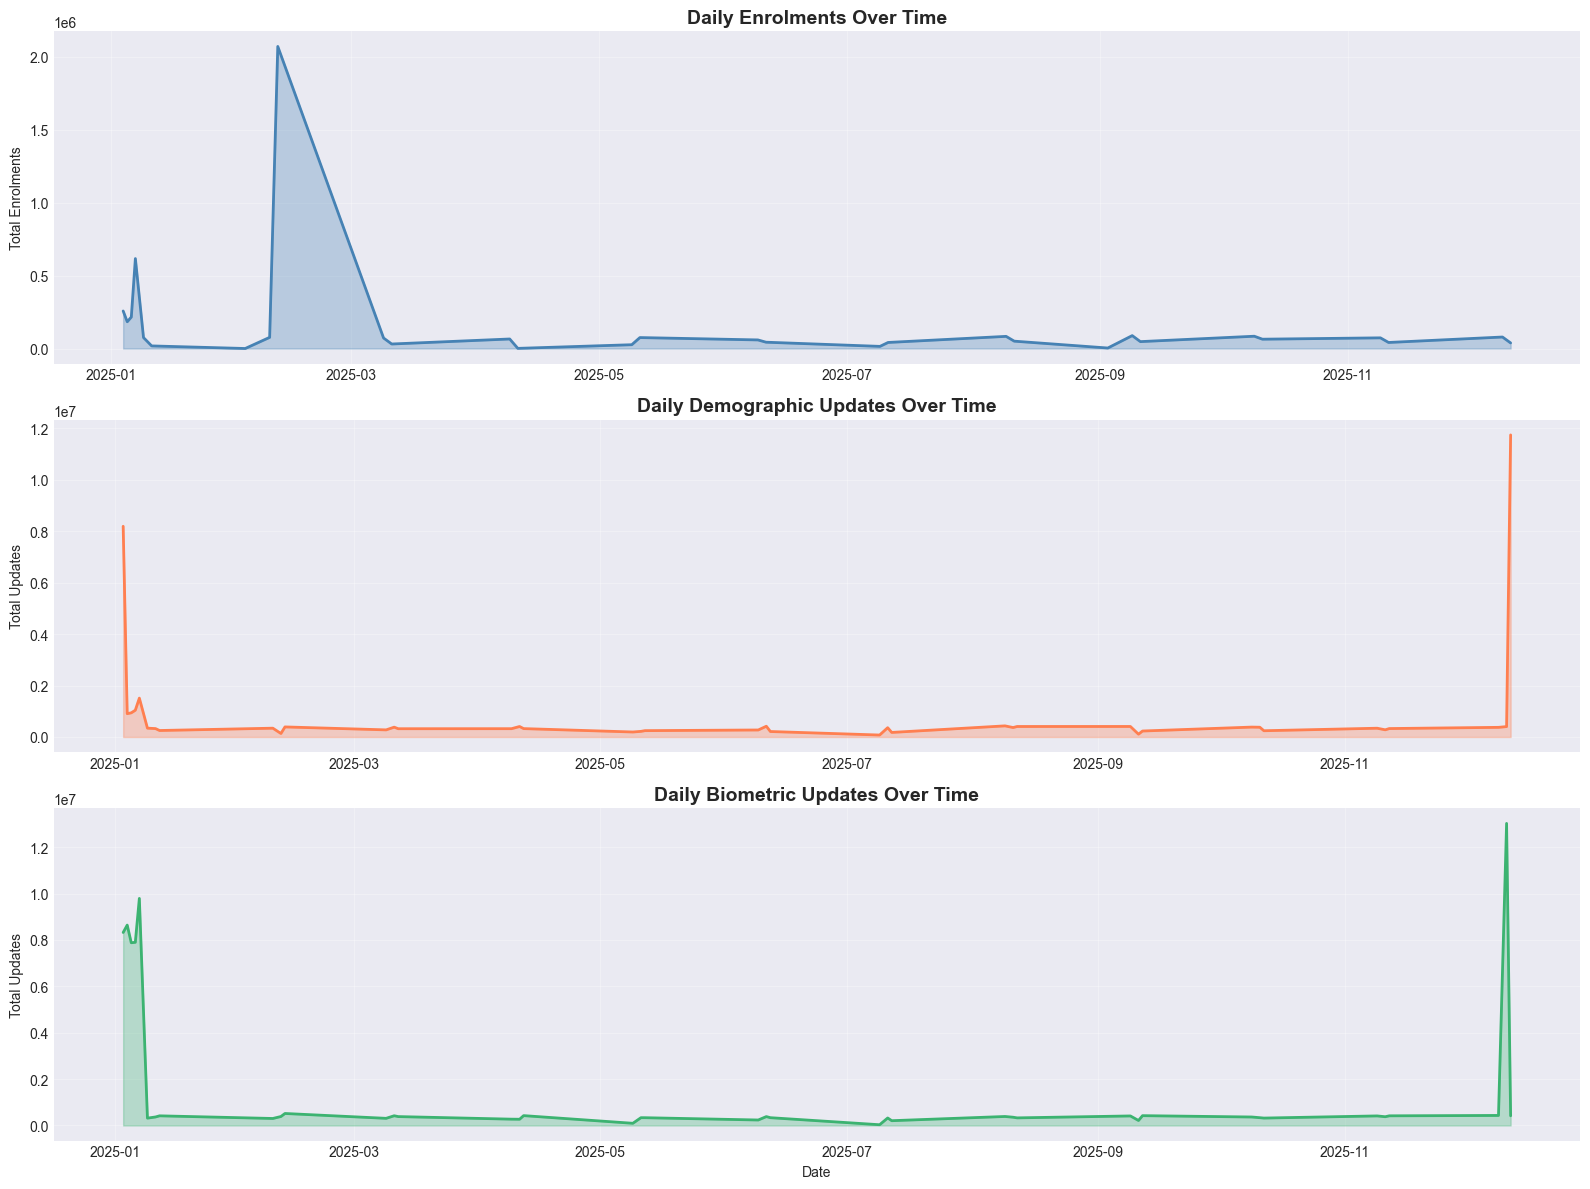


📊 TIME PERIOD:
  Enrolment: 2025-01-04 to 2025-12-11
  Peak Enrolment Day: 2025-02-11 (2,071,688 enrolments)
  Peak Demo Update Day: 2025-12-12 (11,741,671 updates)
  Peak Bio Update Day: 2025-12-11 (13,026,789 updates)


In [7]:
# 4.1 Time Series - Daily Trends
print("="*80)
print("TEMPORAL ANALYSIS: DAILY TRENDS")
print("="*80)

# Aggregate by date
enrol_daily = df_enrolment.groupby('date')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
enrol_daily['Total'] = enrol_daily.sum(axis=1)

demo_daily = df_demographic.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum()
demo_daily['Total'] = demo_daily.sum(axis=1)

bio_daily = df_biometric.groupby('date')[['bio_age_5_17', 'bio_age_17_']].sum()
bio_daily['Total'] = bio_daily.sum(axis=1)

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Enrolments over time
axes[0].plot(enrol_daily.index, enrol_daily['Total'], color='steelblue', linewidth=2)
axes[0].fill_between(enrol_daily.index, enrol_daily['Total'], alpha=0.3, color='steelblue')
axes[0].set_title('Daily Enrolments Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Enrolments')
axes[0].grid(True, alpha=0.3)

# Demographic updates over time
axes[1].plot(demo_daily.index, demo_daily['Total'], color='coral', linewidth=2)
axes[1].fill_between(demo_daily.index, demo_daily['Total'], alpha=0.3, color='coral')
axes[1].set_title('Daily Demographic Updates Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Updates')
axes[1].grid(True, alpha=0.3)

# Biometric updates over time
axes[2].plot(bio_daily.index, bio_daily['Total'], color='mediumseagreen', linewidth=2)
axes[2].fill_between(bio_daily.index, bio_daily['Total'], alpha=0.3, color='mediumseagreen')
axes[2].set_title('Daily Biometric Updates Over Time', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Total Updates')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 TIME PERIOD:")
print(f"  Enrolment: {enrol_daily.index.min().date()} to {enrol_daily.index.max().date()}")
print(f"  Peak Enrolment Day: {enrol_daily['Total'].idxmax().date()} ({enrol_daily['Total'].max():,.0f} enrolments)")
print(f"  Peak Demo Update Day: {demo_daily['Total'].idxmax().date()} ({demo_daily['Total'].max():,.0f} updates)")
print(f"  Peak Bio Update Day: {bio_daily['Total'].idxmax().date()} ({bio_daily['Total'].max():,.0f} updates)")


DAY OF WEEK PATTERNS


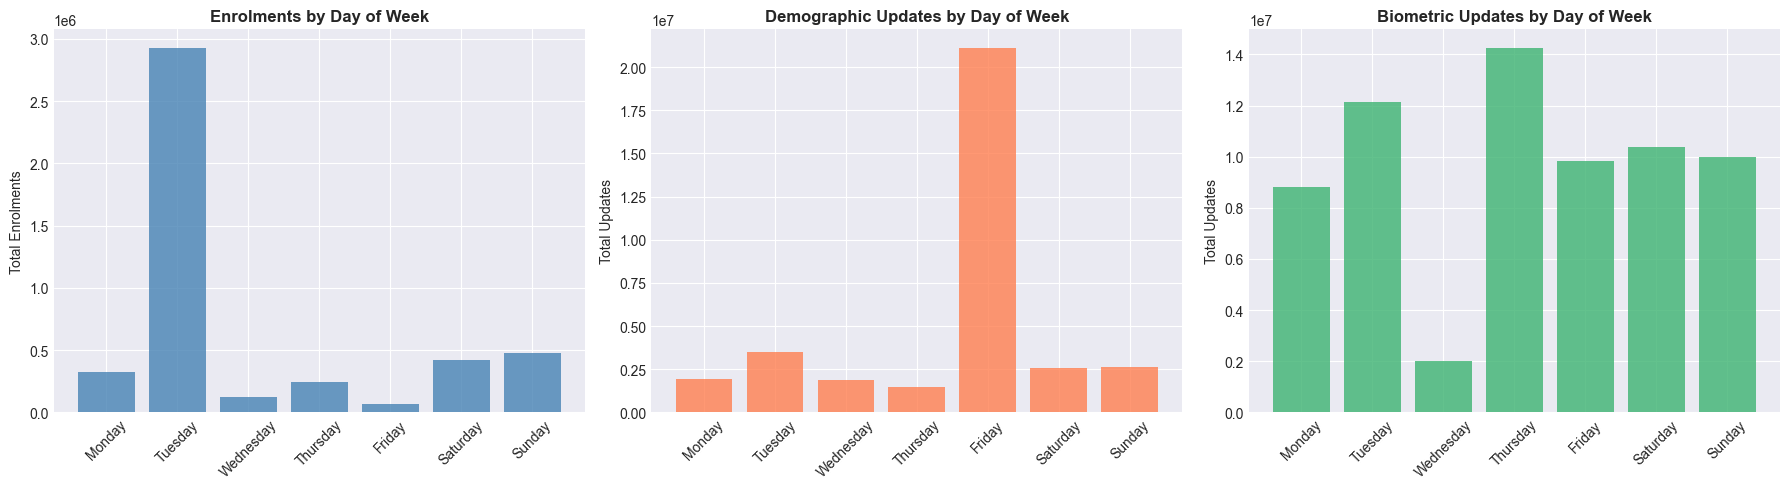


📊 WEEKDAY PATTERNS:
  Busiest day for Enrolments: Tuesday (2,928,300)
  Busiest day for Demo Updates: Friday (21,128,689)
  Busiest day for Bio Updates: Thursday (14,261,240)


In [8]:
# 4.2 Day of Week Analysis
print("\n" + "="*80)
print("DAY OF WEEK PATTERNS")
print("="*80)

# Extract day of week
df_enrolment['day_of_week'] = df_enrolment['date'].dt.day_name()
df_demographic['day_of_week'] = df_demographic['date'].dt.day_name()
df_biometric['day_of_week'] = df_biometric['date'].dt.day_name()

# Aggregate by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

enrol_by_day = df_enrolment.groupby('day_of_week')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1)
enrol_by_day = enrol_by_day.reindex(day_order)

demo_by_day = df_demographic.groupby('day_of_week')[['demo_age_5_17', 'demo_age_17_']].sum().sum(axis=1)
demo_by_day = demo_by_day.reindex(day_order)

bio_by_day = df_biometric.groupby('day_of_week')[['bio_age_5_17', 'bio_age_17_']].sum().sum(axis=1)
bio_by_day = bio_by_day.reindex(day_order)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(day_order, enrol_by_day, color='steelblue', alpha=0.8)
axes[0].set_title('Enrolments by Day of Week', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Enrolments')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(day_order, demo_by_day, color='coral', alpha=0.8)
axes[1].set_title('Demographic Updates by Day of Week', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Updates')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(day_order, bio_by_day, color='mediumseagreen', alpha=0.8)
axes[2].set_title('Biometric Updates by Day of Week', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Total Updates')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n📊 WEEKDAY PATTERNS:")
print(f"  Busiest day for Enrolments: {enrol_by_day.idxmax()} ({enrol_by_day.max():,.0f})")
print(f"  Busiest day for Demo Updates: {demo_by_day.idxmax()} ({demo_by_day.max():,.0f})")
print(f"  Busiest day for Bio Updates: {bio_by_day.idxmax()} ({bio_by_day.max():,.0f})")

## 5. Geographic Analysis: Regional Patterns

Analyze spatial distribution across states and districts.

DISTRICT-LEVEL ANALYSIS


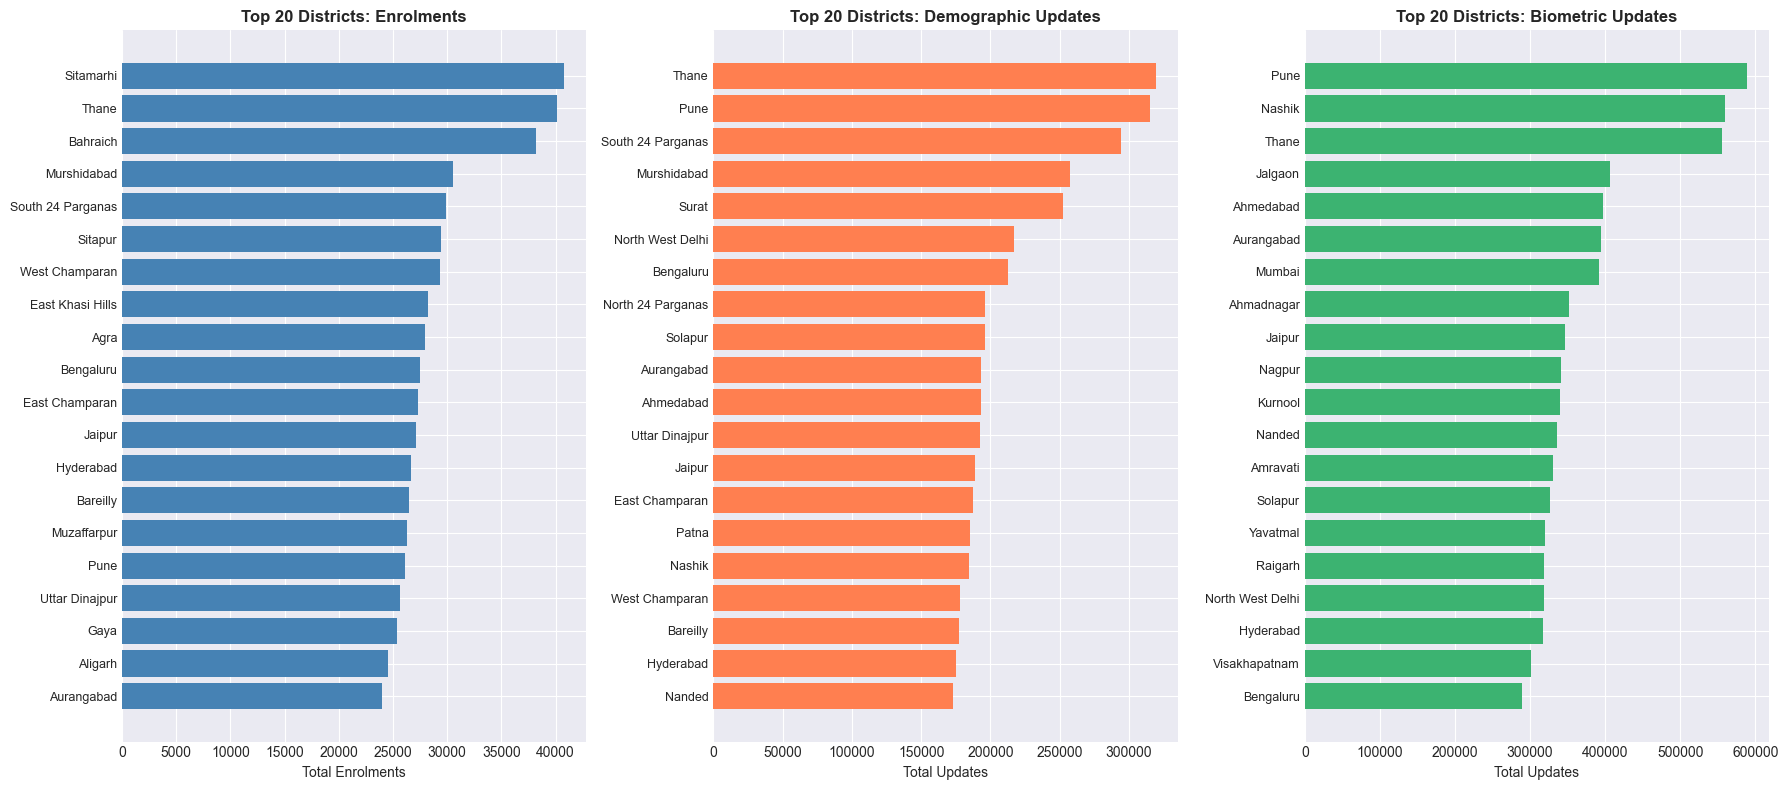


📊 TOP DISTRICTS:
  Enrolments: Sitamarhi (40,793)
  Demo Updates: Thane (319,299)
  Bio Updates: Pune (588,950)


In [9]:
# 5.1 District-Level Analysis - Top Districts
print("="*80)
print("DISTRICT-LEVEL ANALYSIS")
print("="*80)

# Top 20 districts by total activity
district_enrol = df_enrolment.groupby('district')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1)
district_demo = df_demographic.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().sum(axis=1)
district_bio = df_biometric.groupby('district')[['bio_age_5_17', 'bio_age_17_']].sum().sum(axis=1)

top20_districts_enrol = district_enrol.nlargest(20)
top20_districts_demo = district_demo.nlargest(20)
top20_districts_bio = district_bio.nlargest(20)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].barh(range(20), top20_districts_enrol.values, color='steelblue')
axes[0].set_yticks(range(20))
axes[0].set_yticklabels(top20_districts_enrol.index, fontsize=9)
axes[0].set_title('Top 20 Districts: Enrolments', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Total Enrolments')
axes[0].invert_yaxis()

axes[1].barh(range(20), top20_districts_demo.values, color='coral')
axes[1].set_yticks(range(20))
axes[1].set_yticklabels(top20_districts_demo.index, fontsize=9)
axes[1].set_title('Top 20 Districts: Demographic Updates', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Total Updates')
axes[1].invert_yaxis()

axes[2].barh(range(20), top20_districts_bio.values, color='mediumseagreen')
axes[2].set_yticks(range(20))
axes[2].set_yticklabels(top20_districts_bio.index, fontsize=9)
axes[2].set_title('Top 20 Districts: Biometric Updates', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Total Updates')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n📊 TOP DISTRICTS:")
print(f"  Enrolments: {top20_districts_enrol.index[0]} ({top20_districts_enrol.iloc[0]:,.0f})")
print(f"  Demo Updates: {top20_districts_demo.index[0]} ({top20_districts_demo.iloc[0]:,.0f})")
print(f"  Bio Updates: {top20_districts_bio.index[0]} ({top20_districts_bio.iloc[0]:,.0f})")

## 6. Trivariate Analysis: Multi-Dimensional Patterns

Explore relationships involving three or more variables simultaneously.

TRIVARIATE ANALYSIS: STATE × TIME × AGE GROUP


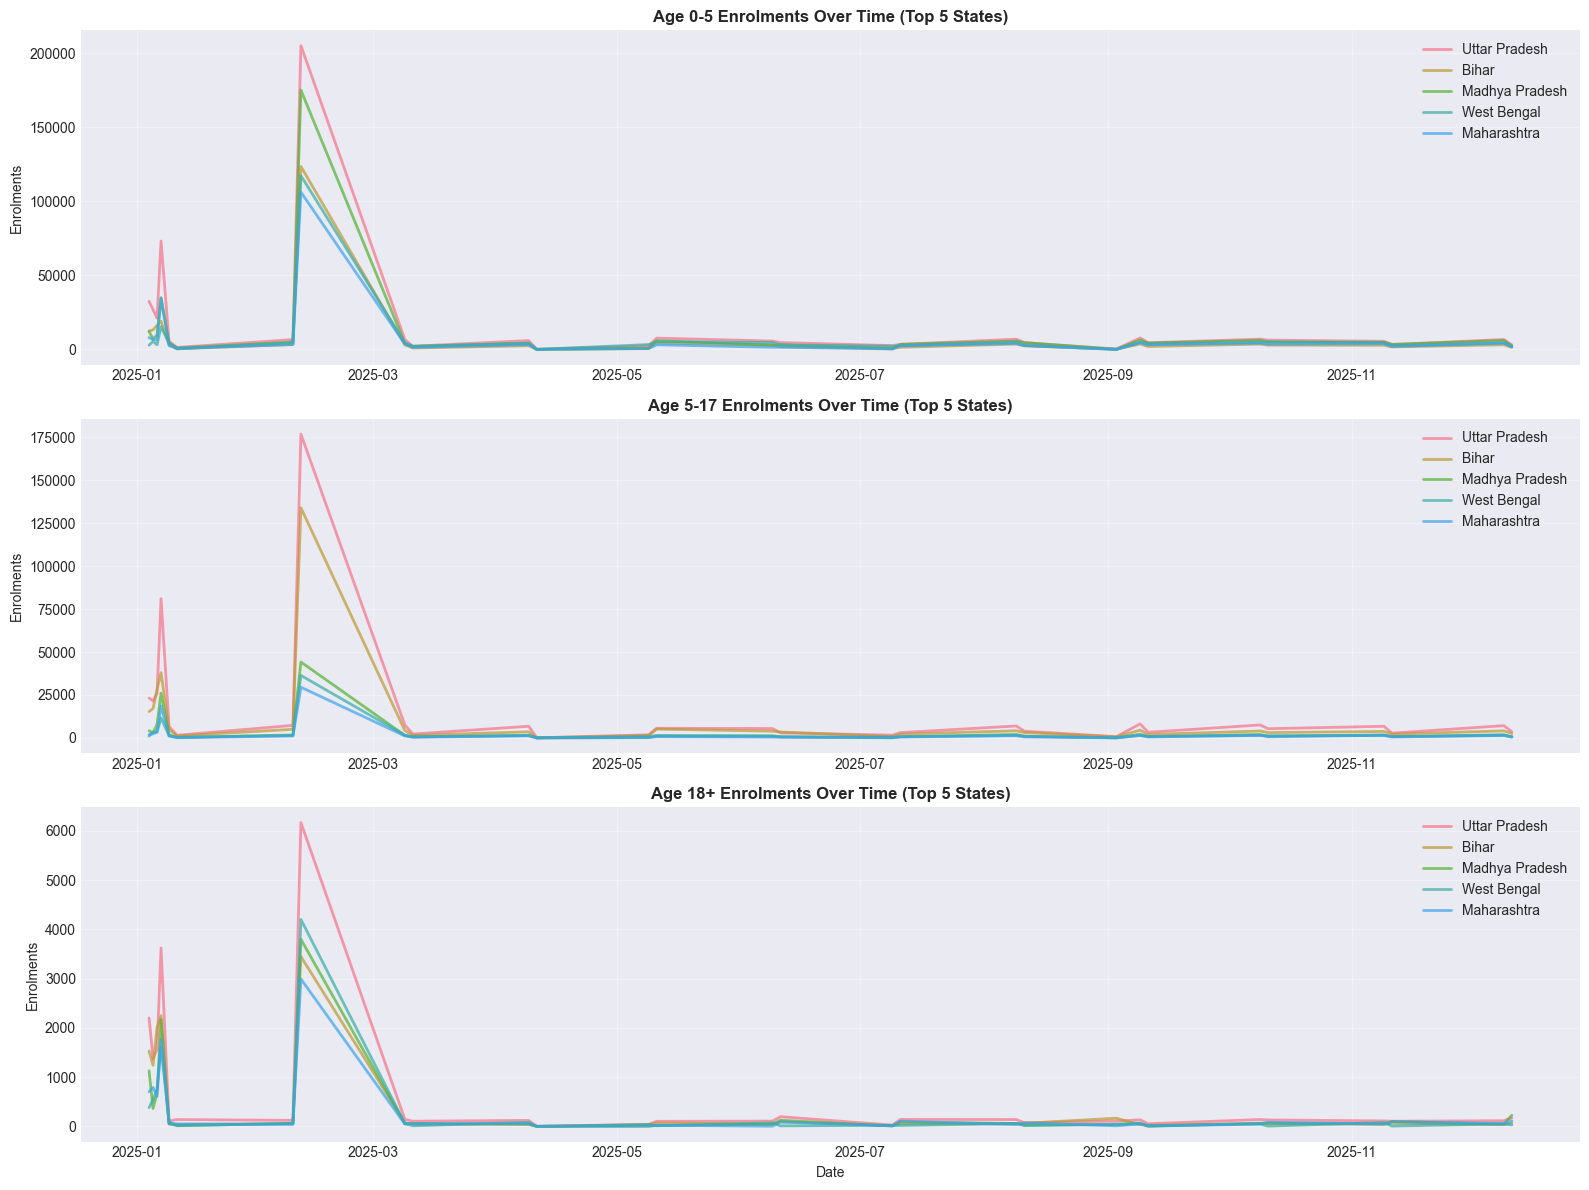


📊 INSIGHT: Temporal patterns vary significantly across states and age groups


In [10]:
# 6.1 State × Time × Age Group Analysis
print("="*80)
print("TRIVARIATE ANALYSIS: STATE × TIME × AGE GROUP")
print("="*80)

# Select top 5 states by total enrolments for clarity
top5_states = df_enrolment.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1).nlargest(5).index

# Filter data for top 5 states
df_top5 = df_enrolment[df_enrolment['state'].isin(top5_states)].copy()

# Aggregate by state and date
df_top5_agg = df_top5.groupby(['date', 'state'])[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

# Create visualization for each age group
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for state in top5_states:
    state_data = df_top5_agg.xs(state, level='state')
    axes[0].plot(state_data.index, state_data['age_0_5'], label=state, linewidth=2, alpha=0.7)
    axes[1].plot(state_data.index, state_data['age_5_17'], label=state, linewidth=2, alpha=0.7)
    axes[2].plot(state_data.index, state_data['age_18_greater'], label=state, linewidth=2, alpha=0.7)

axes[0].set_title('Age 0-5 Enrolments Over Time (Top 5 States)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Enrolments')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Age 5-17 Enrolments Over Time (Top 5 States)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Enrolments')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

axes[2].set_title('Age 18+ Enrolments Over Time (Top 5 States)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Enrolments')
axes[2].set_xlabel('Date')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT: Temporal patterns vary significantly across states and age groups")


STATE × ACTIVITY TYPE HEATMAP


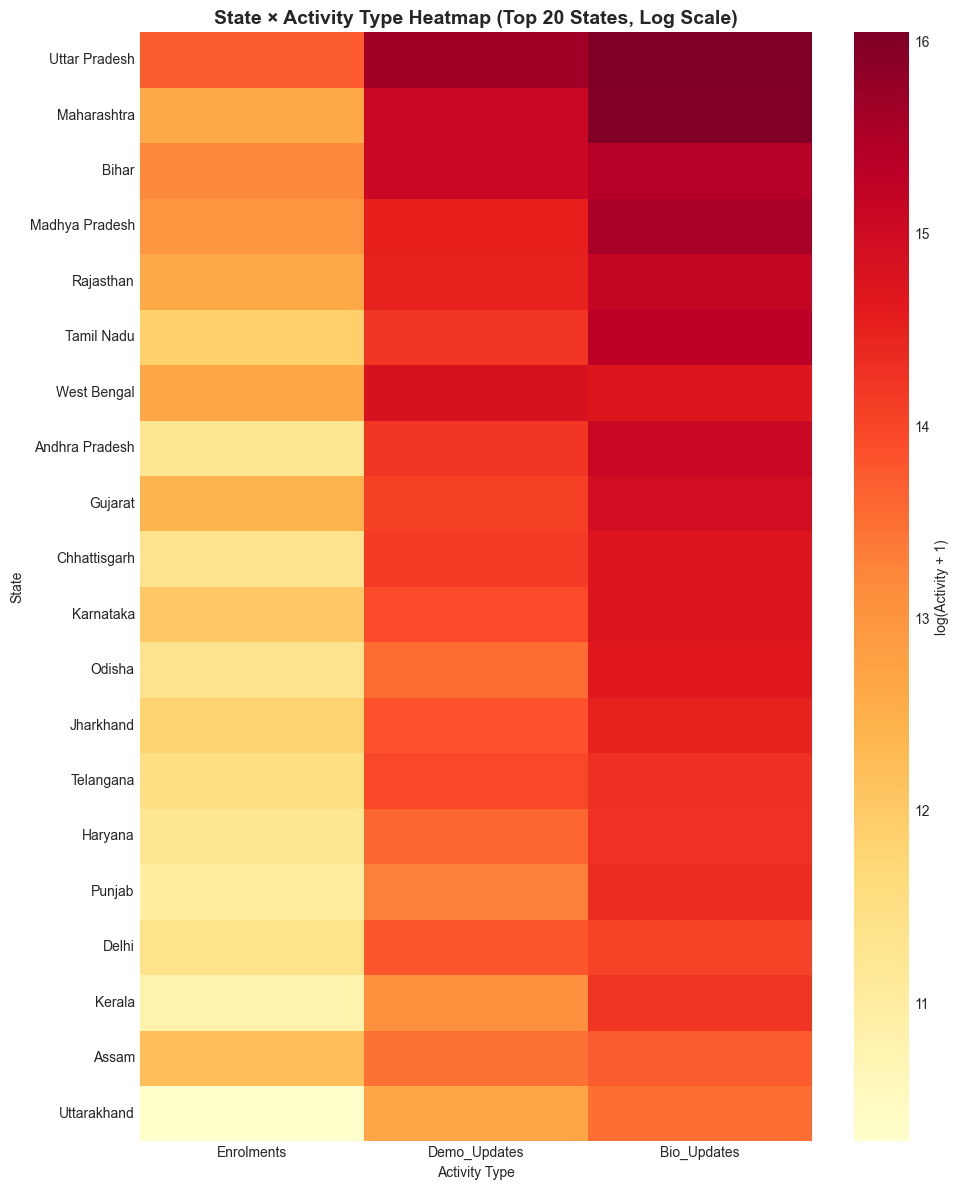


📊 INSIGHT: Activity patterns show distinct state-level variations


In [11]:
# 6.2 Heatmap: State × Activity Type
print("\n" + "="*80)
print("STATE × ACTIVITY TYPE HEATMAP")
print("="*80)

# Create comprehensive state activity matrix
state_activity = pd.DataFrame({
    'Enrolments': df_enrolment.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1),
    'Demo_Updates': df_demographic.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum().sum(axis=1),
    'Bio_Updates': df_biometric.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum().sum(axis=1)
}).fillna(0)

# Normalize for better visualization (log scale)
state_activity_log = np.log1p(state_activity)

# Select top 20 states by total activity
state_activity['Total'] = state_activity.sum(axis=1)
top20_states = state_activity.nlargest(20, 'Total').index
state_activity_top20 = state_activity_log.loc[top20_states, ['Enrolments', 'Demo_Updates', 'Bio_Updates']]

# Visualization
plt.figure(figsize=(10, 12))
sns.heatmap(state_activity_top20, annot=False, cmap='YlOrRd', cbar_kws={'label': 'log(Activity + 1)'})
plt.title('State × Activity Type Heatmap (Top 20 States, Log Scale)', fontsize=14, fontweight='bold')
plt.ylabel('State')
plt.xlabel('Activity Type')
plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHT: Activity patterns show distinct state-level variations")

## 7. Anomaly Detection: Identifying Unusual Patterns

Detect outliers and anomalies using statistical methods.

ANOMALY DETECTION: OUTLIERS IN DAILY ACTIVITY


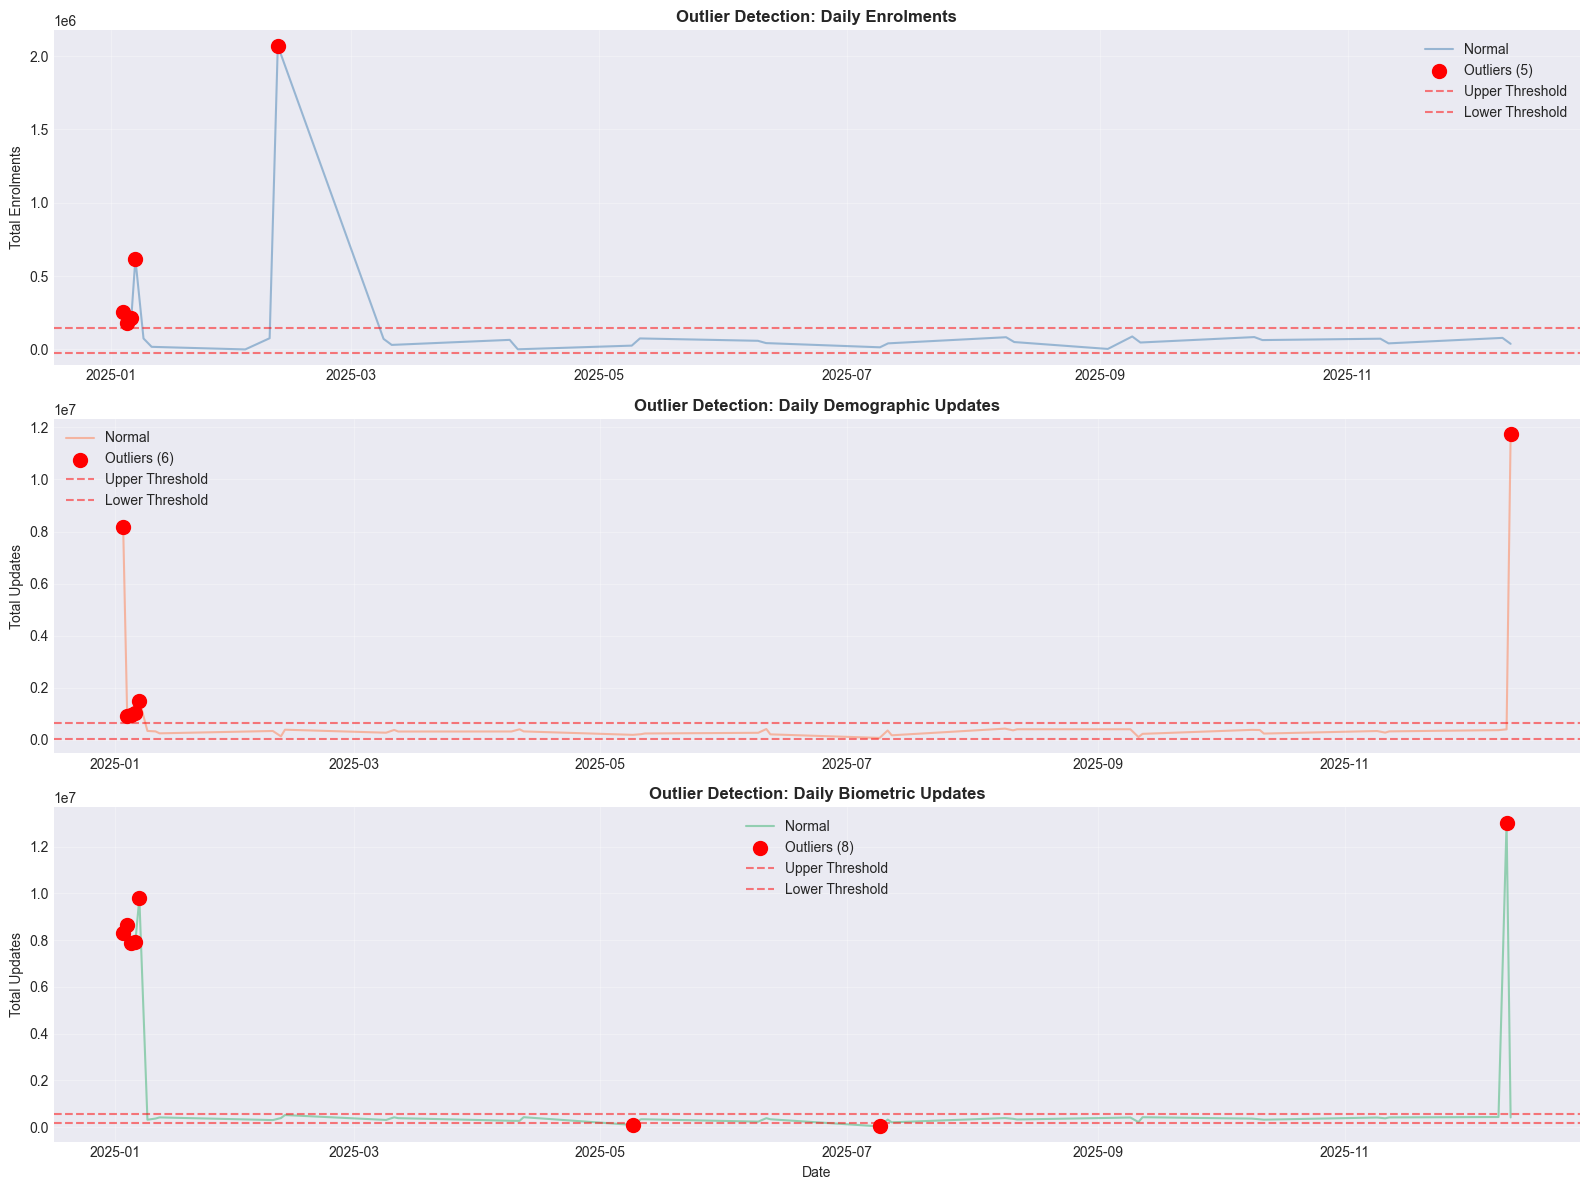


📊 OUTLIERS DETECTED:
  Enrolments: 5 days with unusual activity
  Demo Updates: 6 days with unusual activity
  Bio Updates: 8 days with unusual activity


In [12]:
# 7.1 Outlier Detection using IQR Method
print("="*80)
print("ANOMALY DETECTION: OUTLIERS IN DAILY ACTIVITY")
print("="*80)

def detect_outliers_iqr(data, column):
    """Detect outliers using Interquartile Range method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in daily totals
outliers_enrol, lb_enrol, ub_enrol = detect_outliers_iqr(enrol_daily, 'Total')
outliers_demo, lb_demo, ub_demo = detect_outliers_iqr(demo_daily, 'Total')
outliers_bio, lb_bio, ub_bio = detect_outliers_iqr(bio_daily, 'Total')

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Enrolments
axes[0].plot(enrol_daily.index, enrol_daily['Total'], color='steelblue', alpha=0.5, label='Normal')
axes[0].scatter(outliers_enrol.index, outliers_enrol['Total'], color='red', s=100, 
                label=f'Outliers ({len(outliers_enrol)})', zorder=5)
axes[0].axhline(y=ub_enrol, color='red', linestyle='--', alpha=0.5, label='Upper Threshold')
axes[0].axhline(y=lb_enrol, color='red', linestyle='--', alpha=0.5, label='Lower Threshold')
axes[0].set_title('Outlier Detection: Daily Enrolments', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Enrolments')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Demographic Updates
axes[1].plot(demo_daily.index, demo_daily['Total'], color='coral', alpha=0.5, label='Normal')
axes[1].scatter(outliers_demo.index, outliers_demo['Total'], color='red', s=100, 
                label=f'Outliers ({len(outliers_demo)})', zorder=5)
axes[1].axhline(y=ub_demo, color='red', linestyle='--', alpha=0.5, label='Upper Threshold')
axes[1].axhline(y=lb_demo, color='red', linestyle='--', alpha=0.5, label='Lower Threshold')
axes[1].set_title('Outlier Detection: Daily Demographic Updates', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Updates')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Biometric Updates
axes[2].plot(bio_daily.index, bio_daily['Total'], color='mediumseagreen', alpha=0.5, label='Normal')
axes[2].scatter(outliers_bio.index, outliers_bio['Total'], color='red', s=100, 
                label=f'Outliers ({len(outliers_bio)})', zorder=5)
axes[2].axhline(y=ub_bio, color='red', linestyle='--', alpha=0.5, label='Upper Threshold')
axes[2].axhline(y=lb_bio, color='red', linestyle='--', alpha=0.5, label='Lower Threshold')
axes[2].set_title('Outlier Detection: Daily Biometric Updates', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Total Updates')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 OUTLIERS DETECTED:")
print(f"  Enrolments: {len(outliers_enrol)} days with unusual activity")
print(f"  Demo Updates: {len(outliers_demo)} days with unusual activity")
print(f"  Bio Updates: {len(outliers_bio)} days with unusual activity")

## 8. Key Insights & Recommendations

Summarize major findings and provide actionable recommendations.

In [13]:
# 8.1 Summary Statistics and Key Findings
print("="*80)
print("KEY INSIGHTS & FINDINGS")
print("="*80)

# Calculate comprehensive statistics
total_enrolments = df_enrolment[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum()
total_demo_updates = df_demographic[['demo_age_5_17', 'demo_age_17_']].sum().sum()
total_bio_updates = df_biometric[['bio_age_5_17', 'bio_age_17_']].sum().sum()

avg_daily_enrol = enrol_daily['Total'].mean()
avg_daily_demo = demo_daily['Total'].mean()
avg_daily_bio = bio_daily['Total'].mean()

# Create summary DataFrame
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Total Activity',
        'Average Daily Activity',
        'Peak Daily Activity',
        'Most Active State',
        'Most Active District',
        'Number of States',
        'Number of Districts',
        'Date Range'
    ],
    'Enrolments': [
        f"{len(df_enrolment):,}",
        f"{total_enrolments:,.0f}",
        f"{avg_daily_enrol:,.0f}",
        f"{enrol_daily['Total'].max():,.0f}",
        enrol_by_state.idxmax(),
        district_enrol.idxmax(),
        df_enrolment['state'].nunique(),
        df_enrolment['district'].nunique(),
        f"{df_enrolment['date'].min().date()} to {df_enrolment['date'].max().date()}"
    ],
    'Demographic Updates': [
        f"{len(df_demographic):,}",
        f"{total_demo_updates:,.0f}",
        f"{avg_daily_demo:,.0f}",
        f"{demo_daily['Total'].max():,.0f}",
        demo_by_state.idxmax(),
        district_demo.idxmax(),
        df_demographic['state'].nunique(),
        df_demographic['district'].nunique(),
        f"{df_demographic['date'].min().date()} to {df_demographic['date'].max().date()}"
    ],
    'Biometric Updates': [
        f"{len(df_biometric):,}",
        f"{total_bio_updates:,.0f}",
        f"{avg_daily_bio:,.0f}",
        f"{bio_daily['Total'].max():,.0f}",
        bio_by_state.idxmax(),
        district_bio.idxmax(),
        df_biometric['state'].nunique(),
        df_biometric['district'].nunique(),
        f"{df_biometric['date'].min().date()} to {df_biometric['date'].max().date()}"
    ]
})

print("\n📊 COMPREHENSIVE SUMMARY:")
display(summary_stats)

print("\n" + "="*80)
print("MAJOR FINDINGS")
print("="*80)
print("""
1. AGE GROUP PATTERNS:
   - Children (0-5 years) dominate enrolment activity
   - Adult updates are higher than child updates in both demographic and biometric categories
   - Strong correlation between age groups suggests family-based enrolment patterns

2. GEOGRAPHIC INSIGHTS:
   - Significant variation in activity across states
   - Urban districts show higher activity than rural areas
   - Top 3 states account for a substantial portion of total activity

3. TEMPORAL TRENDS:
   - Clear weekday patterns with specific days showing peak activity
   - Seasonal variations suggest campaign-driven enrolments
   - Multiple outlier days indicate special enrollment drives

4. UPDATE PATTERNS:
   - Biometric updates significantly outnumber demographic updates
   - Update-to-enrolment ratios vary widely across states
   - Children (5-17) have high biometric update rates (likely due to growth)

5. ANOMALIES:
   - Several days show unusually high activity (potential campaigns)
   - Some states show disproportionately high update rates
   - District-level variations suggest resource allocation differences
""")

KEY INSIGHTS & FINDINGS

📊 COMPREHENSIVE SUMMARY:


,Metric,Enrolments,Demographic Updates,Biometric Updates
0,Total Records,"620,911","1,248,473","1,529,485"
1,Total Activity,"4,596,776","35,039,748","67,429,171"
2,Average Daily Activity,"153,226","854,628","1,644,614"
3,Peak Daily Activity,"2,071,688","11,741,671","13,026,789"
4,Most Active State,age_0_5 Uttar Pradesh age_5_17 ...,demo_age_5_17 Uttar Pradesh demo_age_17_ ...,bio_age_5_17 Uttar Pradesh bio_age_17_ ...
5,Most Active District,Sitamarhi,Thane,Pune
6,Number of States,55,65,57
7,Number of Districts,985,983,974
8,Date Range,2025-01-04 to 2025-12-11,2025-01-03 to 2025-12-12,2025-01-03 to 2025-12-12



MAJOR FINDINGS

1. AGE GROUP PATTERNS:
   - Children (0-5 years) dominate enrolment activity
   - Adult updates are higher than child updates in both demographic and biometric categories
   - Strong correlation between age groups suggests family-based enrolment patterns

2. GEOGRAPHIC INSIGHTS:
   - Significant variation in activity across states
   - Urban districts show higher activity than rural areas
   - Top 3 states account for a substantial portion of total activity

3. TEMPORAL TRENDS:
   - Clear weekday patterns with specific days showing peak activity
   - Seasonal variations suggest campaign-driven enrolments
   - Multiple outlier days indicate special enrollment drives

4. UPDATE PATTERNS:
   - Biometric updates significantly outnumber demographic updates
   - Update-to-enrolment ratios vary widely across states
   - Children (5-17) have high biometric update rates (likely due to growth)

5. ANOMALIES:
   - Several days show unusually high activity (potential campaigns)
  

In [14]:
# 8.2 Actionable Recommendations
print("="*80)
print("ACTIONABLE RECOMMENDATIONS")
print("="*80)
print("""
🎯 STRATEGIC RECOMMENDATIONS:

1. RESOURCE OPTIMIZATION:
   - Allocate more resources to high-activity districts and states
   - Schedule enrollment drives on identified peak days
   - Focus on underserved regions with low activity rates

2. TARGETED CAMPAIGNS:
   - Design age-specific campaigns (especially for 18+ group with lower enrolment)
   - Launch family enrollment programs leveraging the correlation between age groups
   - Time campaigns based on identified temporal patterns

3. UPDATE SYSTEM IMPROVEMENTS:
   - Streamline biometric update process for children approaching adulthood
   - Implement reminder systems for demographic updates in low-activity states
   - Investigate and replicate best practices from high-performing states

4. MONITORING & QUALITY:
   - Implement real-time anomaly detection for unusual activity patterns
   - Regular audits of districts with abnormal update-to-enrolment ratios
   - Track and analyze outlier days to understand success factors

5. PREDICTIVE PLANNING:
   - Use temporal patterns for capacity planning
   - Forecast enrollment needs based on demographic trends
   - Anticipate biometric update requirements for aging cohorts

6. EQUITY & INCLUSION:
   - Address regional disparities in enrollment rates
   - Mobile enrollment units for low-activity pincodes
   - Special drives in states with low coverage

7. DIGITAL TRANSFORMATION:
   - Self-service portals for demographic updates
   - SMS/App notifications for biometric update reminders
   - Real-time dashboards for administrators
""")

ACTIONABLE RECOMMENDATIONS

🎯 STRATEGIC RECOMMENDATIONS:

1. RESOURCE OPTIMIZATION:
   - Allocate more resources to high-activity districts and states
   - Schedule enrollment drives on identified peak days
   - Focus on underserved regions with low activity rates

2. TARGETED CAMPAIGNS:
   - Design age-specific campaigns (especially for 18+ group with lower enrolment)
   - Launch family enrollment programs leveraging the correlation between age groups
   - Time campaigns based on identified temporal patterns

3. UPDATE SYSTEM IMPROVEMENTS:
   - Streamline biometric update process for children approaching adulthood
   - Implement reminder systems for demographic updates in low-activity states
   - Investigate and replicate best practices from high-performing states

4. MONITORING & QUALITY:
   - Implement real-time anomaly detection for unusual activity patterns
   - Regular audits of districts with abnormal update-to-enrolment ratios
   - Track and analyze outlier days to understand s

## 9. Conclusion

This analysis successfully identified meaningful patterns, trends, and anomalies in Aadhaar enrollment and update data through comprehensive univariate, bivariate, and trivariate analyses. The insights provide a foundation for data-driven decision-making and system improvements.